<h2>Credit Score
<h3>Classificação - Naive Bayes

<h3>Ajustar a largura do jupyter notebook

In [20]:
#Apenas executar os comandos abaixo
from IPython.core.display import display, HTML 
display(HTML("<style>.container {width:90% !important;}</style>"))

<h3>Bibliotecas

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

<h3>Carregando Dataset de Crédito

In [22]:
credito = pd.read_csv(r'C:\Users\hik_m\Documents\Jornada do Conhecimento\Udemy\Formação Cientista de Dados\Machine Learning\Dados\Credit.csv')

In [23]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [24]:
credito.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [25]:
credito.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [26]:
#Resumo do dataframe em linhas X colunas
credito.shape

(1000, 21)

<h3>Segredando o Dataset com variáveis previsoras (independente) da minha variável a ser prevista (label/dependente) <h4>Interessante observar que quando coloco .values no final da minha segregação, automaticamente transformo o dataframe em um array

In [27]:
#Como estou pegando o intervalo ele está capiturando da coluna 0 até a coluna 19
previsoras = credito.iloc[:, 0:20].values 

In [28]:
#Identifico o tipo da variável criada
type(previsoras) 

numpy.ndarray

In [29]:
#trazendo todos os valores na posição 0
previsoras[0] 

array(['<0', 6, "'critical/other existing credit'", 'radio/tv', 1169,
       "'no known savings'", '>=7', 4, "'male single'", 'none', 4,
       "'real estate'", 67, 'none', 'own', 2, 'skilled', 1, 'yes', 'yes'],
      dtype=object)

In [30]:
classe = credito.iloc[:, 20].values

In [31]:
#Trouxe apenas a minhas classe ou label na qual quero prever
classe[:] 

array(['good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'go

<h4>Como o algoritmo GaussianNB não trabalha com valores categóricos como os valores das colunas credit_history, preciso transformar estes atributos em numeros. Para isso farei uma nova importanção

In [32]:
#Crio uma variável chamada labelencoder da classe que acabamos de importar (LabelEncoder)
labelencoder = LabelEncoder()

In [33]:
#Faço a conversão
previsoras[:, 0] = labelencoder.fit_transform(previsoras[:, 0])

In [34]:
previsoras[0][0]

2

In [35]:
previsoras[0:10]

array([[2, 6, "'critical/other existing credit'", 'radio/tv', 1169,
        "'no known savings'", '>=7', 4, "'male single'", 'none', 4,
        "'real estate'", 67, 'none', 'own', 2, 'skilled', 1, 'yes',
        'yes'],
       [1, 48, "'existing paid'", 'radio/tv', 5951, '<100', '1<=X<4', 2,
        "'female div/dep/mar'", 'none', 2, "'real estate'", 22, 'none',
        'own', 1, 'skilled', 1, 'none', 'yes'],
       [0, 12, "'critical/other existing credit'", 'education', 2096,
        '<100', '4<=X<7', 2, "'male single'", 'none', 3, "'real estate'",
        49, 'none', 'own', 1, "'unskilled resident'", 2, 'none', 'yes'],
       [2, 42, "'existing paid'", 'furniture/equipment', 7882, '<100',
        '4<=X<7', 2, "'male single'", 'guarantor', 4, "'life insurance'",
        45, 'none', "'for free'", 1, 'skilled', 2, 'none', 'yes'],
       [2, 24, "'delayed previously'", "'new car'", 4870, '<100',
        '1<=X<4', 3, "'male single'", 'none', 4, "'no known property'",
        53, 'none', 

In [36]:
previsoras[:, 0] = labelencoder.fit_transform(previsoras[:, 0])
previsoras[:, 2] = labelencoder.fit_transform(previsoras[:, 2])
previsoras[:, 3] = labelencoder.fit_transform(previsoras[:, 3])
previsoras[:, 5] = labelencoder.fit_transform(previsoras[:, 5])
previsoras[:, 6] = labelencoder.fit_transform(previsoras[:, 6])
previsoras[:, 8] = labelencoder.fit_transform(previsoras[:, 8])
previsoras[:, 9] = labelencoder.fit_transform(previsoras[:, 9])
previsoras[:, 11] = labelencoder.fit_transform(previsoras[:, 11])
previsoras[:, 13] = labelencoder.fit_transform(previsoras[:, 13])
previsoras[:, 14] = labelencoder.fit_transform(previsoras[:, 14])
previsoras[:, 16] = labelencoder.fit_transform(previsoras[:, 16])
previsoras[:, 18] = labelencoder.fit_transform(previsoras[:, 18])
previsoras[:, 19] = labelencoder.fit_transform(previsoras[:, 19])

In [37]:
previsoras[0]

array([2, 6, 1, 7, 1169, 0, 3, 4, 3, 2, 4, 2, 67, 1, 1, 2, 3, 1, 1, 1],
      dtype=object)

<h3>Após transformar os dados categórico em númericos devido uma necessidade do algotimo Naive Bayes. Faço a segregação de dados de treino e teste 

In [38]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsoras, classe, test_size = 0.3, random_state=0)
#quando eu uso random_state igual 0 e estou garantindo que toda vez que eu executar vou pegar as mesmas segregações de dados

In [39]:
print('Dados de Treinamento:' ,X_treinamento.shape, '\nLabel de Treinamento:', y_treinamento.shape)

Dados de Treinamento: (700, 20) 
Label de Treinamento: (700,)


In [40]:
print('Dados de Teste:' ,X_teste.shape, '\nLabel de Teste:', y_teste.shape)

Dados de Teste: (300, 20) 
Label de Teste: (300,)


<h3>Criando o modelo

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

#Criando o objeto NaiveBayes
naive_bayes = GaussianNB()

In [42]:
#Vamos fazer o treinamento do modelo com o "fit", ou seja, com o fit vou tentar encaixar o dados de treinamento no modelo
#tentando relacionar os dados de treinamento (X_treinamento) com as resposta (y_treinamento)
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

<h4>Vale ressaltar que esta biblioteca do python não permite que verifiquemos as probalidades que o algortimo gera, porém a tabela de probabilidade já está criada. Neste ponto, não precisaremos mais dos dados de X_treinamento visto que meu modelo já foi criado e treinado com o fit de dados de treinamento

<h4>A partir deste momento já posso fazer previsões 

In [43]:
#Neste momento já foram feitas minhas previsões.
previsoes = naive_bayes.predict(X_teste)

In [44]:
#Abrindo o valor das minhas previsões
previsoes[:]

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [45]:
previsoes.shape

(300,)

<h4>Preciso comparar agora o valor encontrado nas minhas previsões com o valor de y_teste 

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

#Crio minha matrix de confusao
confusao = confusion_matrix(y_teste, previsoes)

In [47]:
confusao
#Válido ressaltar que não sabe onde houve acerto ou erro com a exibição da matrix desta maneira.

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [48]:
#Crio meu objeto de taxa de acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.71

In [49]:
#Crio minha taxa de erro
taxa_erro = 1-taxa_acerto
taxa_erro

0.29000000000000004

<h4> Para visualização de resultados de machine learning, uma boa biblioteca para utilizar é a yellowbrick. Vou utiliza-la para visualizar de maneira mais agradável minha matrix de confusão criada. 

c:\users\hik_m\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


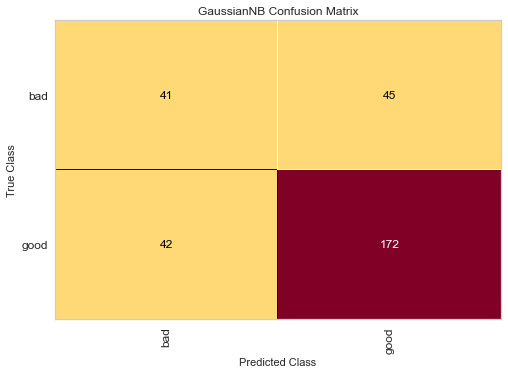

In [50]:
from yellowbrick.classifier import ConfusionMatrix

#Crio o objeto v de visualização
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

<h2>Simulando o modelo em produção onde recebo uma instância e preciso classificar se é good ou bad

In [51]:
novo_credito = pd.read_csv(r'C:\Users\hik_m\Documents\Jornada do Conhecimento\Udemy\Formação Cientista de Dados\Machine Learning\Dados\NovoCredit.csv')
novo_credito.shape

(1, 20)

In [52]:
type(novo_credito)

pandas.core.frame.DataFrame

<h4>Vou sobreescrever o objeto novo_credito para deixar ele no formato de um numpy arrary. Lembrando que esta tranformação se dá pelo uso do .values ao final da linha de comando

In [53]:
novo_credito = novo_credito.iloc[:, 0:20].values
novo_credito.shape

(1, 20)

In [54]:
type(novo_credito)

numpy.ndarray

<h4>Preciso fazer as mesmas transformações nos dados da nova instância que recebi utilizando o mesmo objeto utilizado no treinamento. Importante destacar que preciso do mesmos dados para que o meu modelo treinado gere uma saída aderente a previsão esperada

In [55]:
#Apenas para efeito de aprendizagem, verifico o valor da minha primeira coluna que está como 'no checking'
novo_credito

array([["'no checking'", 12, "'existing paid'", 'radio/tv', 804, '<100',
        '>=7', 4, "'male single'", 'none', 4, 'car', 38, 'none', 'own',
        1, 'skilled', 1, 'none', 'yes']], dtype=object)

In [56]:
#Faço a transformação
novo_credito[:, 0] = labelencoder.fit_transform(novo_credito[:, 0])

In [57]:
#É possível verificar que a coluna com valor 'no checking' agora está com o valor igual 0
novo_credito

array([[0, 12, "'existing paid'", 'radio/tv', 804, '<100', '>=7', 4,
        "'male single'", 'none', 4, 'car', 38, 'none', 'own', 1,
        'skilled', 1, 'none', 'yes']], dtype=object)

In [58]:
#Faço o restante das conversões
novo_credito [:, 2] = labelencoder.fit_transform(novo_credito[:, 2])
novo_credito [:, 3] = labelencoder.fit_transform(novo_credito[:, 3])
novo_credito [:, 5] = labelencoder.fit_transform(novo_credito[:, 5])
novo_credito [:, 6] = labelencoder.fit_transform(novo_credito[:, 6])
novo_credito [:, 8] = labelencoder.fit_transform(novo_credito[:, 8])
novo_credito [:, 9] = labelencoder.fit_transform(novo_credito[:, 9])
novo_credito [:, 11] = labelencoder.fit_transform(novo_credito[:, 11])
novo_credito [:, 13] = labelencoder.fit_transform(novo_credito[:, 13])
novo_credito [:, 14] = labelencoder.fit_transform(novo_credito[:, 14])
novo_credito [:, 16] = labelencoder.fit_transform(novo_credito[:, 16])
novo_credito [:, 18] = labelencoder.fit_transform(novo_credito[:, 18])
novo_credito [:, 19] = labelencoder.fit_transform(novo_credito[:, 19])

In [59]:
#É possível verificar que todos o valores categóricos foram tranformados em números conforme mandatoriedade para uso do algoritmo NaiveBayes
novo_credito

array([[0, 12, 0, 0, 804, 0, 0, 4, 0, 0, 4, 0, 38, 0, 0, 1, 0, 1, 0, 0]],
      dtype=object)

<h4>Com a instância carregada (registro no qual quero fazer a minha previsão no ambiente de produção) e também com as devidas transformações, chamo o modelo criado para fazer a previsão classficando entre good ou bad. Assim, uma instituição financeira poderia saber se fornece credito ou não para um determinado cliente

In [60]:
#Como podemos observar, fazendo a previsão com o modelo chamado naive_bayes o cliente foi classificado como bom para o fornecimento de crédito
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')

In [61]:
prod = naive_bayes.predict(novo_credito)
print('Cliente classficado como:', prod)

Cliente classficado como: ['good']
